# Text Classification using RNN

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
import tensorflow as tf
from nltk.tokenize import WordPunctTokenizer

In [2]:
df = pd.read_csv(r'financetweets.csv')
df1 = pd.read_csv(r'sportstweets.csv')
df2 = pd.read_csv(r'entertainmenttweets.csv')
#iky = apep[apep['Geographic Area'] == 'Indonesia']


C:\Users\yudha\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (9,21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
print(list(df.columns))

['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone', 'user_id', 'username', 'name', 'place', 'tweet', 'mentions', 'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count', 'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video', 'near', 'geo', 'source', 'user_rt_id', 'user_rt', 'retweet_id', 'reply_to', 'retweet_date']


In [4]:
ent = df2[['tweet']].iloc[:30000]
lenent = len(ent.index)
spo = df1[['tweet']].iloc[:20000]
lenspo = len(spo.index)
fin = df[['tweet']].iloc[:50000]
lenfin = len(fin.index)
data = fin.append(ent, ignore_index = True)
data = data.append(spo, ignore_index = True)
data

,tweet
0,Pemerintah mengeluarkan aturan baru terkait te...
1,"""Apalagi porsinya sedikit bahkan saya dengan t..."
2,Rumah kos-kosan dengan tipe kamar 2x1 meter di...
3,Menhub Budi Karya Sumadi mengatakan akan membu...
4,Rumah kos-kosan dengan tipe kamar 2x1 meter di...
5,Kementan sebut keberhasilan pembangunan sektor...
6,Kos-kosan berukuran 2x1 M di Jakarta baru-baru...
7,Hunian berbentuk kotak atau yang biasa dikenal...
8,"""Lebih baik selesaikan masalah defisit BPJS Ke..."
9,"""Pak Luhut mau mempercepat Perpres kendaraan l..."


## Labelling

In [5]:
label = []
for i in range(lenfin):
    label.append('finance')
for i in range(lenent):
    label.append('entertainment')
for i in range(lenspo):
    label.append('sports')
print(label)

['finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance'

In [6]:
panjangsatu = 0
for i in label:
    if i=='finance':
        panjangsatu += 1
print(panjangsatu)

50000


In [7]:
data['label'] = label
data

,tweet,label
0,Pemerintah mengeluarkan aturan baru terkait te...,finance
1,"""Apalagi porsinya sedikit bahkan saya dengan t...",finance
2,Rumah kos-kosan dengan tipe kamar 2x1 meter di...,finance
3,Menhub Budi Karya Sumadi mengatakan akan membu...,finance
4,Rumah kos-kosan dengan tipe kamar 2x1 meter di...,finance
5,Kementan sebut keberhasilan pembangunan sektor...,finance
6,Kos-kosan berukuran 2x1 M di Jakarta baru-baru...,finance
7,Hunian berbentuk kotak atau yang biasa dikenal...,finance
8,"""Lebih baik selesaikan masalah defisit BPJS Ke...",finance
9,"""Pak Luhut mau mempercepat Perpres kendaraan l...",finance


## Data Shuffling

In [8]:
orig = data.sample(frac=1).reset_index(drop=True)
orig

,tweet,label
0,Kementerian Perindustrian optimistis sektor in...,finance
1,Franck Kessie membuat Milan kembali unggul 3-1...,sports
2,"Foto: Tembus Bukit, Begini Terowongan Tol Cisu...",finance
3,"Jelang Natal dan Tahun Baru, Pertamina Jamin E...",finance
4,"Ketua Umum Mualaf Center Indonesia, Steven Ind...",entertainment
5,Pengamat Sebut Bambang Soesatyo Antitesis Airl...,finance
6,Saat ini dunia masih memiliki beberapa tantang...,finance
7,Lembaga riset menyebut Indonesia adalah negara...,finance
8,"Dhawiya Sering Menangis, Elvy Sukaesih Kerap M...",entertainment
9,Persija Jakarta menang telak atas Shan United ...,sports


## Data cleansing

In [9]:
tweets = orig["tweet"].values
labels = orig['label'].values
print (tweets[0:10], labels[0:10])

['Kementerian Perindustrian optimistis sektor industri manufaktur dapat tumbuh lebih agresif pada kuartal II-2019. https://finance.detik.com/industri/d-4565462/kinerja-industri-manufaktur-diprediksi-menanjak-ditopang-ramadhan?utm_term=echobox&utm_campaign=detikcomsocmed&utm_medium=oa&utm_content=detikfinance&utm_source=Twitter#Echobox=1558851830\xa0…'
 'Franck Kessie membuat Milan kembali unggul 3-1 atas SPAL.   Klasemen (masih tetap) kecuali Inter tergelincir.  3. Atalanta  4. Inter  5. Milan  6. Roma  #MatchdayGoal #SerieA pic.twitter.com/Tf1azDylMW'
 'Foto: Tembus Bukit, Begini Terowongan Tol Cisumdawu Dibangun  http://detik.id/VRWqPY\xa0 pic.twitter.com/salMeiU4e5'
 'Jelang Natal dan Tahun Baru, Pertamina Jamin Elpiji dan BBM Aman  http://detik.id/6YBpJS\xa0 pic.twitter.com/cuZlX2Esiv'
 'Ketua Umum Mualaf Center Indonesia, Steven Indra Wibowo menegaskan bahwa alasan Roger Danuarta memeluk islam bukan karena perempuan. Begini ungkapannya: https://20.detik.com/e-flash/20181031-181031

In [10]:
def clean_tweets(tweet):
    user_removed = re.sub(r'@[A-Za-z0-9]+','',tweet)
    link_removed = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+','',user_removed)
    number_removed = re.sub('[^a-zA-Z]', ' ', link_removed)
    lower_case_tweet= number_removed.lower()
    tok = WordPunctTokenizer()
    words = tok.tokenize(lower_case_tweet)
    clean_tweet = (' '.join(words)).strip()
    return clean_tweet

In [11]:
cleaned_tweets = []
for tweet in tweets:
    cleaned_tweets.append(clean_tweets(str(tweet)))
print(cleaned_tweets[0:5])

['kementerian perindustrian optimistis sektor industri manufaktur dapat tumbuh lebih agresif pada kuartal ii echobox', 'franck kessie membuat milan kembali unggul atas spal klasemen masih tetap kecuali inter tergelincir atalanta inter milan roma matchdaygoal seriea pic twitter com tf azdylmw', 'foto tembus bukit begini terowongan tol cisumdawu dibangun pic twitter com salmeiu e', 'jelang natal dan tahun baru pertamina jamin elpiji dan bbm aman pic twitter com cuzlx esiv', 'ketua umum mualaf center indonesia steven indra wibowo menegaskan bahwa alasan roger danuarta memeluk islam bukan karena perempuan begini ungkapannya']


## Data preparation

In [12]:
import numpy as np
len_tweet = []
tok = WordPunctTokenizer()
for tweet in cleaned_tweets:
    len_tweet.append(len(tok.tokenize(tweet)))
print("Panjang maximum twitter:",np.max(len_tweet))

Panjang maximum twitter: 51


## Target diubah menjadi bentuk categorical

In [13]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(list(set(labels)))
print(list(le.classes_))
num_labels = le.transform(labels) 

['entertainment', 'finance', 'sports']


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cleaned_tweets, num_labels, test_size=0.2, random_state=42)
print (len(X_train))

80000


In [15]:
print (len(X_test))

20000


In [16]:
print (set(y_train))

{0, 1, 2}


In [17]:
y_train = tf.keras.utils.to_categorical(y_train, 3)

In [18]:
y_test = tf.keras.utils.to_categorical(y_test, 3)

In [19]:
from __future__ import absolute_import, division, print_function, unicode_literals
import collections
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
import os
import random

## Membuat list vocab

In [20]:
t = tf.keras.preprocessing.text.Tokenizer()
t.fit_on_texts(np.array(X_train))

In [21]:
vocab_size = len(t.word_index) + 1
print (vocab_size)
print(t.word_index)

65088
{'echobox': 1, 'di': 2, 'twitter': 3, 'com': 4, 'pic': 5, 'yang': 6, 'ini': 7, 'dan': 8, 'dengan': 9, 'untuk': 10, 'dari': 11, 'ke': 12, 'apa': 13, 'indonesia': 14, 'akan': 15, 'rp': 16, 'ada': 17, 'itu': 18, 'dalam': 19, 'tahun': 20, 'tak': 21, 'sudah': 22, 'bisa': 23, 'baru': 24, 'pada': 25, 'jadi': 26, 'seperti': 27, 'matchdaygoal': 28, 'menjadi': 29, 'jakarta': 30, 'masih': 31, 'saat': 32, 'hari': 33, 'begini': 34, 'jokowi': 35, 'hingga': 36, 'harga': 37, 'tidak': 38, 'ya': 39, 'liga': 40, 'pemerintah': 41, 'lagi': 42, 'soal': 43, 'satu': 44, 'juga': 45, 'karena': 46, 'saja': 47, 'dunia': 48, 'rumah': 49, 'kata': 50, 'tol': 51, 'tersebut': 52, 'ri': 53, 'ihsg': 54, 'anak': 55, 'live': 56, 'kembali': 57, 'setelah': 58, 'oleh': 59, 'ia': 60, 'pemain': 61, 'foto': 62, 'salah': 63, 'mereka': 64, 'bagaimana': 65, 'atau': 66, 'banyak': 67, 'belum': 68, 'kini': 69, 'sebagai': 70, 'as': 71, 'lebih': 72, 'film': 73, 'united': 74, 'telah': 75, 'sang': 76, 'bakal': 77, 'mau': 78, 'mente

In [22]:
encoded_X_train = t.texts_to_sequences(X_train)

In [23]:
encoded_X_test = t.texts_to_sequences(X_test)

In [24]:
max_length = 51
padded_X_train = tf.keras.preprocessing.sequence.pad_sequences(encoded_X_train, maxlen=max_length, padding='post')
print(padded_X_train)

[[ 2530  9042   312 ...     0     0     0]
 [  669   227    51 ...     0     0     0]
 [  145  1308  1471 ...     0     0     0]
 ...
 [  150   105    24 ...     0     0     0]
 [  428   428    47 ...     0     0     0]
 [16067    17     6 ...     0     0     0]]


In [25]:
padded_X_test = tf.keras.preprocessing.sequence.pad_sequences(encoded_X_test, maxlen=max_length, padding='post')
print(padded_X_test)

[[  338  1467   364 ...     0     0     0]
 [   62  4447  8128 ...     0     0     0]
 [  246     7  1113 ...     0     0     0]
 ...
 [  222  7467  3272 ...     0     0     0]
 [  939    61  2314 ...     0     0     0]
 [ 5852 12215  6837 ...     0     0     0]]


In [26]:
print(padded_X_train.shape,y_train.shape)

(80000, 51) (80000, 3)


In [27]:
print(padded_X_test.shape,y_test.shape)

(20000, 51) (20000, 3)


In [28]:
import pandas as pd
from gensim.models import Word2Vec, KeyedVectors
import nltk
import re
import tensorflow as tf
import numpy as np
from nltk.tokenize import WordPunctTokenizer

# menyimpan model dalam txt untuk dimasukkan ke jaringan syaraf tiruan


In [29]:
# import os
# # Membuka file penyimpanan word embedding
# embeddings_index = {}
# f = open(os.path.join('', 'id200_embedding_word2vec.txt'), encoding = 'utf-8')
# for line in f:
#     values = line.split()
#     word = values[0]
#     coefs = np.asarray(values[1:])
#     embeddings_index[word] = coefs
# f.close()

In [30]:
# # Melakukan mapping kata yang ada di vocabulary dengan yang ada dalam word embeddings

# embedding_matrix = np.zeros((vocab_size, 200))

# for word, i in t.word_index.items():
#     if i > vocab_size:
#         continue
#     embedding_vector = embeddings_index.get(word)
#     if embedding_vector is not None:
#         embedding_matrix[i] = embedding_vector

In [31]:
from tensorflow.keras.initializers import Constant

model = tf.keras.Sequential()
# Add an Embedding layer expecting input vocab of size 1000, and
# output embedding dimension of size 64.
model.add(layers.Embedding(input_dim=vocab_size,
                           output_dim=200,
#                            embeddings_initializer=Constant(embedding_matrix),
                           input_length=max_length,
                           trainable=False))

# Add an RNN layer with 128 internal units.
model.add(layers.SimpleRNN(128))

# Add a Dense layer with 3 units and softmax activation.
model.add(layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 51, 200)           13017600  
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 128)               42112     
_________________________________________________________________
dense (Dense)                (None, 3)                 387       
Total params: 13,060,099
Trainable params: 42,499
Non-trainable params: 13,017,600
_________________________________________________________________


In [32]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adamax(),
              metrics=['accuracy'])

In [33]:
epochs = 10
batch_size = 32

history = model.fit(padded_X_train, y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1)
#,callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)]

Train on 72000 samples, validate on 8000 samples
Epoch 1/10
72000/72000 [==============================] - 282s 4ms/sample - loss: 0.7633 - accuracy: 0.6536 - val_loss: 0.6876 - val_accuracy: 0.7061
Epoch 2/10
72000/72000 [==============================] - 250s 3ms/sample - loss: 0.6775 - accuracy: 0.7118 - val_loss: 0.6832 - val_accuracy: 0.6996
Epoch 3/10
72000/72000 [==============================] - 242s 3ms/sample - loss: 0.6500 - accuracy: 0.7237 - val_loss: 0.6380 - val_accuracy: 0.7334
Epoch 4/10
72000/72000 [==============================] - 239s 3ms/sample - loss: 0.6305 - accuracy: 0.7316 - val_loss: 0.6258 - val_accuracy: 0.7380
Epoch 5/10
72000/72000 [==============================] - 246s 3ms/sample - loss: 0.6040 - accuracy: 0.7467 - val_loss: 0.6040 - val_accuracy: 0.7513
Epoch 6/10
72000/72000 [==============================] - 232s 3ms/sample - loss: 0.5800 - accuracy: 0.7584 - val_loss: 0.6051 - val_accuracy: 0.7435
Epoch 7/10
72000/72000 [===========================

In [34]:
accr = model.evaluate(padded_X_test,y_test)

20000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

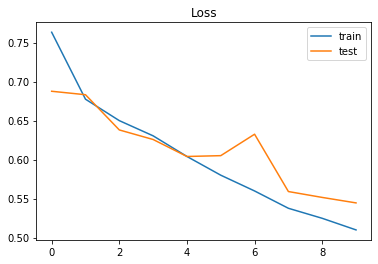

In [35]:
import matplotlib.pyplot as plt
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

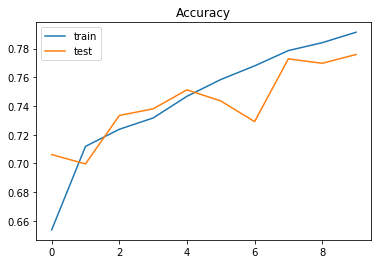

In [36]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();